In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_excel('../data/raw_data/Online Retail.xlsx')

In [4]:
# Basic data exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000   

In [5]:
# Check for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# Remove rows with missing values
df = df.dropna()

In [7]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
# Create a customer-product matrix
customer_product_matrix = df.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack().fillna(0)

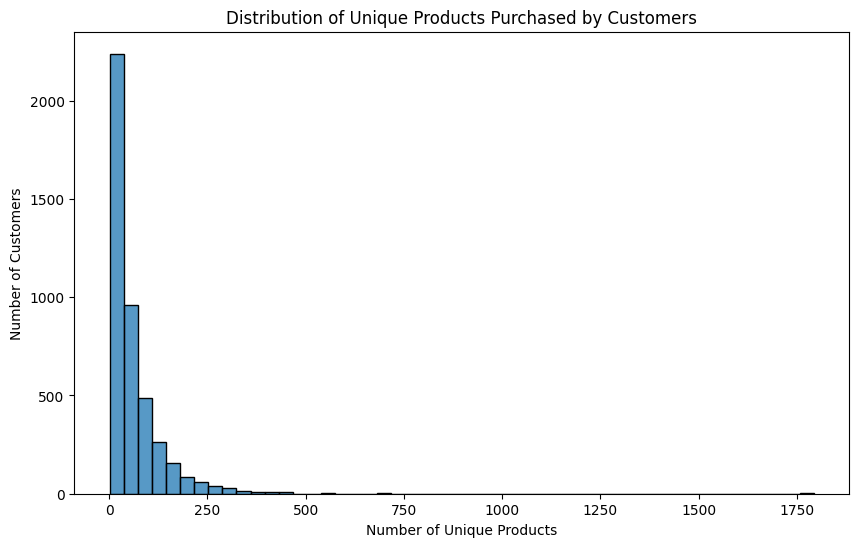

In [9]:
# Visualize the distribution of purchases
plt.figure(figsize=(10, 6))
sns.histplot(df.groupby('CustomerID')['StockCode'].nunique(), bins=50)
plt.title('Distribution of Unique Products Purchased by Customers')
plt.xlabel('Number of Unique Products')
plt.ylabel('Number of Customers')
plt.show()

In [10]:
# Identify top products
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products:")
print(top_products)

Top 10 Products:
StockCode
84077     53215
22197     48712
85099B    45066
84879     35314
85123A    34204
21212     33409
23084     27094
22492     25880
22616     25321
21977     24163
Name: Quantity, dtype: int64


In [11]:
# Identify customers with repeat purchases
repeat_customers = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers = repeat_customers[repeat_customers > 1]
print(f"Number of customers with repeat purchases: {len(repeat_customers)}")

Number of customers with repeat purchases: 3059


In [12]:
# Save processed data for model training
customer_product_matrix.to_csv('../data/processed/customer_product_matrix.csv')